# semseg/predict

based on [camvid.ipynb](./camvid.ipynb).

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import numpy as np
import torch
from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.plugins import seed
from abcli.plugins import cache
from roofAI import NAME, VERSION
from roofAI.semseg import Profile
from roofAI.semseg.model import SemSegModel
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{NAME}-{VERSION}.{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
roofAI-3.72.1.abcli-7.2372.1-unknown, built on 14 October 2023, 17:04:53


In [2]:
profile = Profile.QUICK # FULL, QUICK, VALIDATION

dataset_object = "roofAI-CamVid-v2"
model_object = "roofAI-CamVid-semseg-model-2023-10-13-20-42-58-51612"
prediction_object = objects.unique_object("roofAI-CamVid-semseg-prediction")

📂 roofAI-CamVid-semseg-prediction-2023-10-14-17-04-53-90276


In [3]:
model = SemSegModel(
    model_filename=objects.path_of("model.pth", object_name=model_object),
    profile = profile
    )

SemSegModel.load(/Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-13-20-42-58-51612/model.pth): Profile.QUICK
SemSegModel: se_resnext50_32x4d[imagenet]-sigmoid-> car


SemSegModel.predict(/Users/kamangir/storage/abcli/roofAI-CamVid-v2/SegNet-Tutorial/CamVid/) -cpu-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-prediction-2023-10-14-17-04-53-90276


Dataset: 20 item(s).
Dataset: 20 item(s).


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-prediction-2023-10-14-17-04-53-90276/predict-00019.png


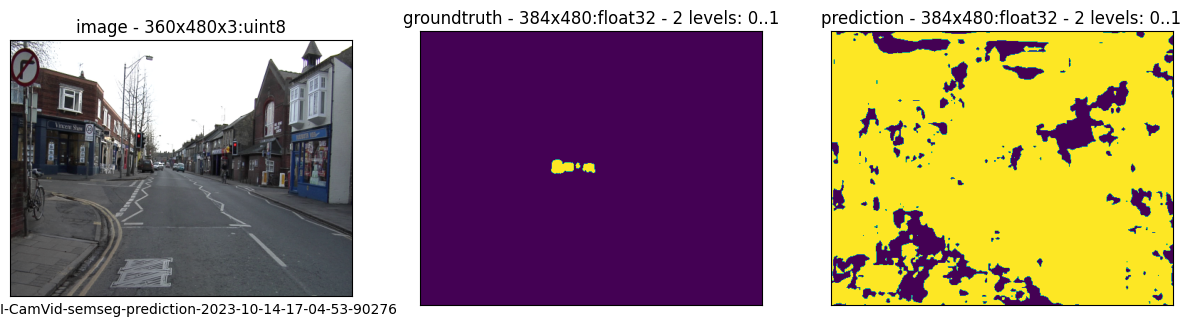

-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-prediction-2023-10-14-17-04-53-90276/predict-00015.png


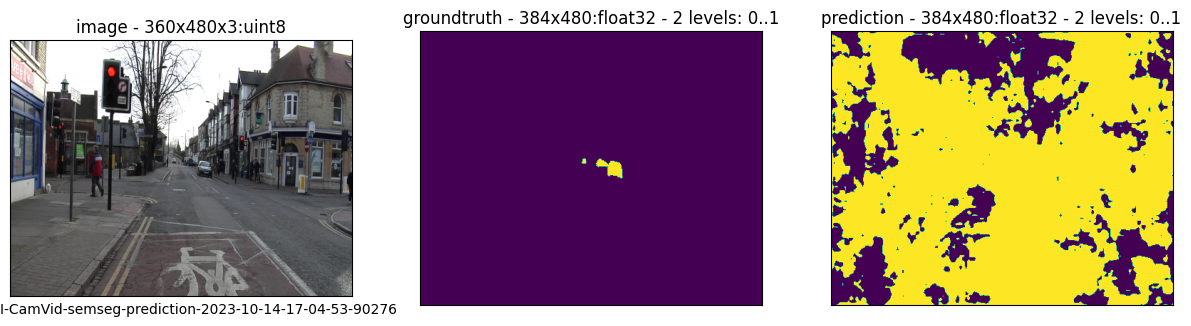

-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-prediction-2023-10-14-17-04-53-90276/predict-00015-b.png


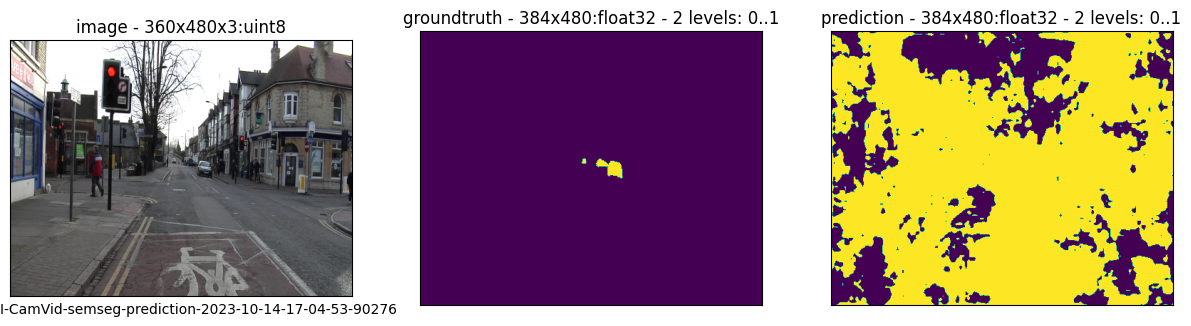

-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-prediction-2023-10-14-17-04-53-90276/predict-00015-b-b.png


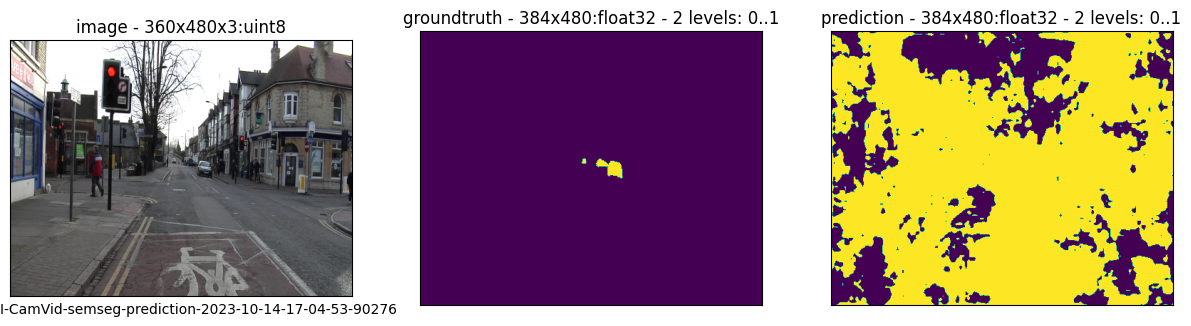

-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-prediction-2023-10-14-17-04-53-90276/predict-00001.png


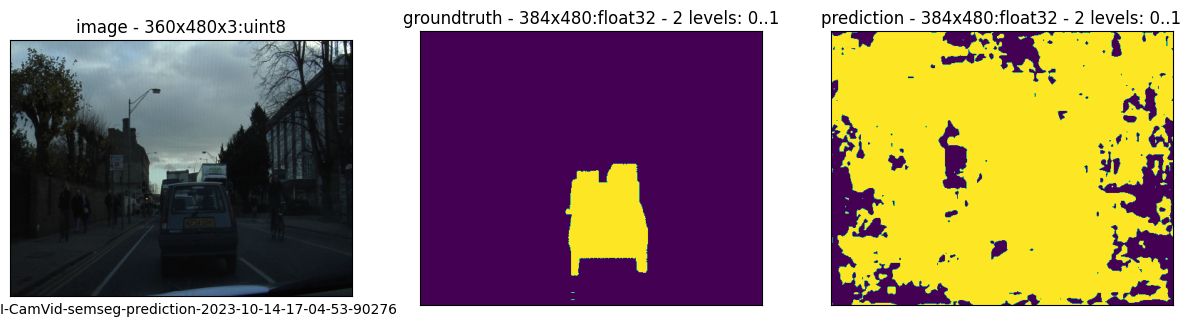

In [4]:
model.predict(dataset_path=objects.path_of(
        "SegNet-Tutorial/CamVid/", 
        object_name=dataset_object
    ),
    output_path=objects.object_path(prediction_object),
    in_notebook=True,
)

In [5]:
%%bash -s $profile $prediction_object
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

profile=$1
prediction_object=$2

abcli select $prediction_object
abcli tag set . built_by_notebook

if [[ "$profile" == Profile.FULL ]] ; then
    abcli upload
fi

📂 abcli: roofAI-CamVid-semseg-prediction-2023-10-14-17-04-53-90276


roofAI-CamVid-semseg-prediction-2023-10-14-17-04-53-90276 += #built_by_notebook.


In [6]:
seed.log(prediction_object)

abcli select roofAI-CamVid-semseg-prediction-2023-10-14-17-04-53-90276; open .


In [7]:
# END